In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates

import time
import seaborn as sns

import random
import matplotlib.dates as mdates #dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [4]:
plt.style.use('seaborn')

In [5]:
data = pd.read_csv('jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv')

In [6]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [7]:
import datetime as dt
data['created_date'] = pd.to_datetime(data['created_date'])

In [8]:
type(data.created_date[1])

pandas._libs.tslibs.timestamps.Timestamp

Trying to fix Unicode Error from the plotly graph below:

In [1]:
#data['created_date_utf8']= str.encode(data['created_date'], 'utf-8')

Create seperate features of hour, day, month, year.

In [9]:
#extract hour
data['created_hour'] = data['created_date'].dt.hour

In [10]:
#extract day
data['created_day'] = data['created_date'].dt.day

In [11]:
#extract month
data['created_month'] = data['created_date'].dt.month

In [12]:
#extract year
data['created_year'] = data['created_date'].dt.year

In [13]:
data.head(2)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,created_hour,created_day,created_month,created_year
0,59848,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,0,0.0,0,4,10,29,9,2015
1,59849,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,0,0.0,0,4,10,29,9,2015


In [14]:
data['created_hour'].min()

0

In [15]:
data['created_hour'].max()

23

In [16]:
tox_by_month = data.groupby('created_hour').mean()['toxic'].reset_index()
tox_by_month.round(2)

,created_hour,toxic
0,0,0.11
1,1,0.11
2,2,0.11
3,3,0.11
4,4,0.11
5,5,0.11
6,6,0.11
7,7,0.11
8,8,0.11
9,9,0.11


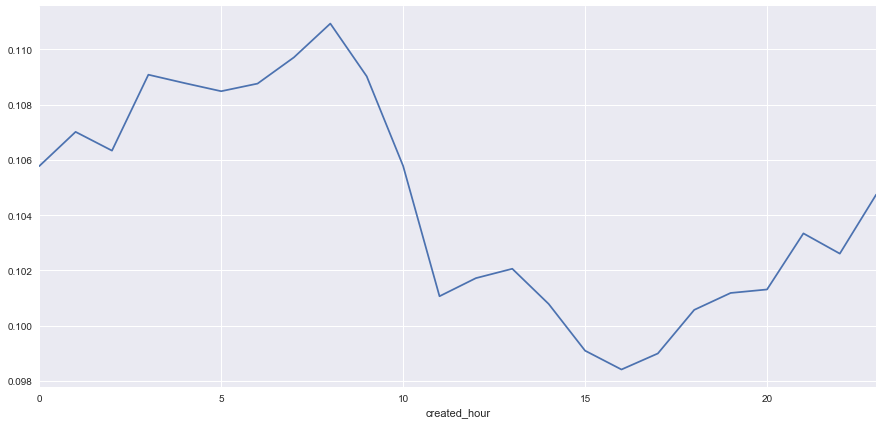

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_hour').mean()['toxic'].plot(ax=ax);

In [18]:
tox_by_year = data.groupby('created_day').mean()['toxic'].reset_index()
tox_by_year.round(2)

,created_day,toxic
0,1,0.10
1,2,0.10
2,3,0.10
3,4,0.10
4,5,0.10
5,6,0.10
6,7,0.10
7,8,0.10
8,9,0.10
9,10,0.10


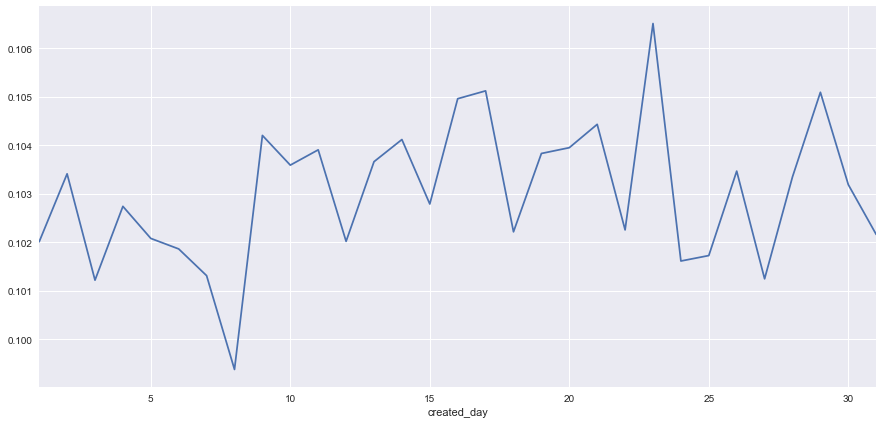

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_day').mean()['toxic'].plot(ax=ax);

In [20]:
tox_by_hour = data.groupby('created_month').mean()['toxic'].reset_index()
tox_by_hour.round(2)

,created_month,toxic
0,1,0.11
1,2,0.10
2,3,0.09
3,4,0.10
4,5,0.10
5,6,0.10
6,7,0.10
7,8,0.11
8,9,0.11
9,10,0.11


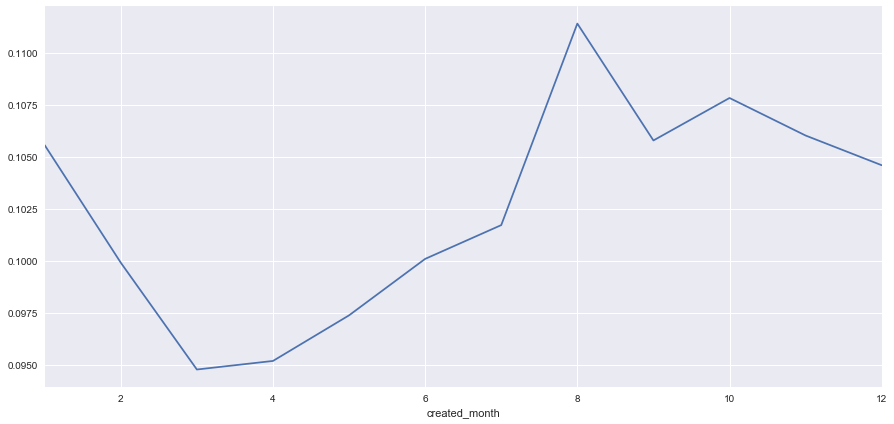

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_month').mean()['toxic'].plot(ax=ax)

In [22]:
tox_by_day = data.groupby('created_year').mean()['toxic'].reset_index()
tox_by_day.round(2)

,created_year,toxic
0,2015,0.06
1,2016,0.10
2,2017,0.10


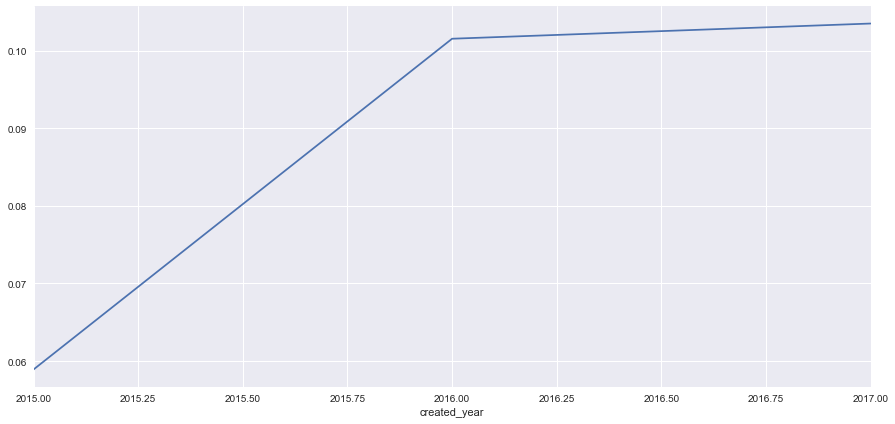

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_year').mean()['toxic'].plot(ax=ax);

Times with highest comment frequency:

In [24]:
data['created_hour'].mode()

0    17
dtype: int64

In [25]:
data['created_day'].mode()

0    6
dtype: int64

In [26]:
data['created_month'].mode()

0    10
dtype: int64

In [27]:
data['created_year'].mode()

0    2017
dtype: int64

In [28]:
#earliest post
data['created_date'].min()

Timestamp('2015-09-29 10:50:41.987077+0000', tz='UTC')

In [29]:
#latest post
data['created_date'].max()

Timestamp('2017-11-11 01:01:10.822969+0000', tz='UTC')

In [30]:
#tox_hour = pd.to_datetime(data.timestamp)
#toxic_time = pd.Series(data=np.array(data.toxic), 
 #                          index=pd.DatetimeIndex(temperature_time_arr), dtype="float")

In [31]:
#ts_temperature_hour = ts_temperature.resample("H").mean()

In [32]:
#ax = plt.figure(figsize=(5,2), dpi=150).add_subplot(111)
#ts_temperature_hour.plot(ax=ax, title="Temperature per hour", color="red")

**Plotly**

In [33]:
import chart_studio
chart_studio.tools.set_credentials_file(username='dren', api_key='••••••••••')

In [34]:
import chart_studio
chart_studio.tools.set_config_file(world_readable=False,
                             sharing='private')

In [35]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [36]:
time_data = go.Scatter(x= data.created_date,
                         y=data.toxic)

layout = go.Layout(title='Toxic Times', xaxis=dict(title='Date'),
                   yaxis=dict(title='(toxicity of comments)'))

fig = go.Figure(data=[time_data], layout=layout)
#py.iplot(fig, sharing='public')